In [1]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid_derivative(x):
    return(sigmoid(x)*(1-sigmoid(x)))

In [3]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

In [33]:
class MLP:
    def __init__(self, input_layer_len, output_layer_len, hidden_layers_len, activation_function):
        
        self.activation_function = activation_function
        self.input_layer = np.zeros((1,input_layer_len))
        self.output_layer = np.zeros((1,output_layer_len))
        self.weights=[]
        
        self.weights.append(np.random.random((hidden_layers_len[0],input_layer_len))*2-1)
        
        for i in range(1,len(hidden_layers_len)):
            self.weights.append(np.random.random((hidden_layers_len[i],hidden_layers_len[i-1]))*2-1)
            
        self.weights.append(np.random.random((output_layer_len,hidden_layers_len[-1]))*2-1)
        
        self.biases=[]
        
        for i in range(len(hidden_layers_len)):
            self.biases.append(np.zeros((hidden_layers_len[i],1)))
            
        
        self.biases.append(np.zeros((output_layer_len,1)))
        
        self.hidden_layers=[]
        
        for i in range(len(hidden_layers_len)):
            self.hidden_layers.append(np.zeros((hidden_layers_len[i],1)))
        
    
        
    def calculate(self,input_layer,memory=False):
        self.input_layer=input_layer.copy()
        
        input_layer=input_layer.T
        
        if(memory):
            for i in range(len(self.weights)-1):
                
                self.hidden_layers[i]=self.weights[i].dot(input_layer)+self.biases[i]
                input_layer=self.activation_function(self.hidden_layers[i])
                
        else:    
            for i in range(len(self.weights)-1):
                input_layer=self.activation_function(self.weights[i].dot(input_layer)+self.biases[i])
                
        
        #mozliwe ze trzeba reshapy
        output_layer=(self.weights[-1].dot(input_layer)+self.biases[-1])
        #print(output_layer.shape)
        self.output_layer=output_layer.T.copy()
        
        
        return(output_layer.T)
        
    def train(self,input_layer,true_output_layer,rate=0.1):
        
        #feedforward
        output_layer=self.calculate(input_layer,memory=True)
        error=sum((true_output_layer-output_layer)**2)/true_output_layer.shape[0]
        print(error)
        #output error identity function
        errors=[0 for i in range(len(self.weights)-1,-1,-1)]
        errors[-1]=(true_output_layer-output_layer)*output_layer
        for i in range(len(self.weights)-2,-1,-1):
            #derivative of sigmoid
            errors[i]=weights[i].dot(error.T)*sigmoid(hidden_layers[i])*(1-sigmoid(hidden_layers[i]))
        
        #gradient descent
        for i in range(len(self.weights)-1,-1,-1):
            self.weights[i]=self.weights[i]-rate
        

In [1]:
def Xavier(a,b):
    pass

In [7]:
def linear(X, W):
    return np.c_[np.ones(X.shape[0]), X] @ W

In [116]:
class MLP:
    def __init__(self, inout, af, daf):
        
        self.af = af
        self.daf = daf
        
        self.W = [np.random.randn(inout[i]+1, inout[i+1]) for i in range(len(inout)-1)]
        
    def forward(self, X):
        z=[]
        
        for w in self.W:
            z+=[X]
            X = self.af(linear(X, w))
        
        return X,z
    
    def train(self,X,Y,rate=0.1):
        
        #feedforward
        z=self.forward(X)
        
        #output error identity function
        errors=[[0]*X.shape[0] for i in range(len(self.W)-1,-1,-1)]
        errors[-1]=(Y-z[0])*daf(linear(z[-1],self.W[-1]))
        for i in range(len(self.W)-2,-1,-1):
            self.W[i+1].T+
            
        
        #gradient descent
        for i in range(len(self.weights)-1,-1,-1):
            self.weights[i]=self.weights[i]-rate
        

In [278]:
test = np.loadtxt("mio1/regression/square-simple-training.csv", delimiter=',', skiprows=1, usecols=range(1,3))

In [279]:
X=test[:,0].reshape(-1,1)

In [280]:
Y=test[:,1].reshape(-1,1)

In [58]:
X=np.concatenate((X,3*X-2),axis=1)

In [59]:
Y=np.concatenate((Y,2*Y+1),axis=1)

In [281]:
mlp=MLP(1,1,[15,17,19],sigmoid)

train_input_layer=(X-X.mean())/X.std()

true_output_layer=(Y-Y.mean())/Y.std()

rate=0.05

beta=0.8

batch=0.2

stop=10**-6

In [107]:
xd=mlp.forward(X)

In [265]:
lin=np.linspace(0,input_layer.shape[0],int(input_layer.shape[0]*batch)).round().astype(int)

In [274]:
lin=np.linspace(0,train_input_layer.shape[0],int(train_input_layer.shape[0]*batch)).round().astype(int)

In [275]:
lin

array([  0,  11,  22,  33,  44,  56,  67,  78,  89, 100])

In [284]:
lin=np.linspace(0,train_input_layer.shape[0],int(train_input_layer.shape[0]*batch)).round().astype(int)
output_layer=mlp.calculate(train_input_layer)
error=sum((true_output_layer-output_layer)**2)
iteration=0
for xd in range(10**4):
    iteration+=1
    
    for b in range(len(lin)-1):
        
        input_layer=train_input_layer[lin[b]:lin[b+1]]
        output_layer=mlp.calculate(input_layer,memory=True)
        batch_size=output_layer.shape[0]
        errors=[[0]*len(mlp.weights) for x in range(batch_size)]
        old_gradient=[0 for x in range(len(mlp.weights))]
        old_gradient_bias=[0 for x in range(len(mlp.weights))]

        for x in range(batch_size):
            #derivative of x is 1
            errors[x][-1]=((output_layer[x]-true_output_layer[lin[b]:lin[b+1]][x])).reshape(-1,1)

            for i in range(len(mlp.weights)-2,-1,-1): 
                errors[x][i]=mlp.weights[i+1].T.dot(errors[x][i+1])*sigmoid_derivative(mlp.hidden_layers[i][:,x:x+1])

        for l in range(1,len(mlp.weights)):

            new_gradient=sum([errors[x][l].dot(mlp.activation_function(mlp.hidden_layers[l-1][:,x:x+1]).T) for x in range(batch_size)])/batch_size
            new_gradient=beta*old_gradient[l]+(1-beta)*new_gradient
            old_gradient[l]=new_gradient
            mlp.weights[l]=mlp.weights[l]-new_gradient*rate

            new_gradient_bias=sum([errors[x][l] for x in range(batch_size)])/batch_size
            new_gradient_bias=beta*old_gradient_bias[l]+(1-beta)*new_gradient_bias
            old_gradient_bias[l]=new_gradient_bias
            mlp.biases[l]=mlp.biases[l]-new_gradient_bias*rate


        new_gradient=sum([errors[x][0].dot((mlp.input_layer.T[:,x:x+1]).T) for x in range(batch_size)])/batch_size
        new_gradient=beta*old_gradient[0]+(1-beta)*new_gradient
        old_gradient[0]=new_gradient
        mlp.weights[0]=mlp.weights[0]-new_gradient*rate

        new_gradient_bias=sum([errors[x][0] for x in range(batch_size)])/batch_size
        new_gradient_bias=beta*old_gradient_bias[0]+(1-beta)*new_gradient_bias
        old_gradient_bias[0]=new_gradient_bias
        mlp.biases[0]=mlp.biases[0]-new_gradient_bias*rate
        
        
    output_layer=mlp.calculate(train_input_layer)
    new_error=sum((true_output_layer-output_layer)**2)
    
    if(iteration % 1000 == 0):
        print(iteration)
    
    if (abs(new_error-error)/error)<stop:
        print((new_error-error)/error)
        print(iteration)
        break
    
    error=new_error


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [286]:
print(error)

[0.01693631]


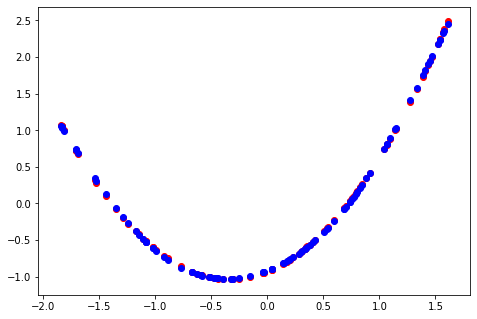

In [285]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(train_input_layer, true_output_layer, color='r')
ax.scatter(train_input_layer,output_layer,color="b")

In [83]:
[mlp.hidden_layers[x].shape for x in range(3)]

[(5, 100), (7, 100), (9, 100)]

In [82]:
[errors[0][x].shape for x in range(len(errors[0]))]

[(5, 1), (7, 1), (9, 1), (2, 1)]

In [71]:
[mlp.weights[x].shape for x in range(len(mlp.weights))]

[(5, 2), (7, 5), (9, 7), (2, 9)]

In [86]:
[mlp.biases[x].shape for x in range(len(mlp.weights))]

[(5, 1), (7, 1), (9, 1), (2, 1)]

In [54]:
mlp.output_layer.shape

(100, 1)

In [401]:
((output_layer[0]-true_output_layer[0])*output_layer[0]).reshape(-1,1)

array([[0.02163984]])

In [370]:
len(errors[0])

4

In [371]:
len(errors)

100

In [199]:
mlp.weights[1].shape

(4, 3)

In [73]:
#warstwa neuron pattern
mlp.hidden_layers[0][0]

array([-0.03199908,  0.00470084, -0.25536774,  0.35579902,  0.00207604,
        0.34537689,  0.29979171,  0.13802362,  0.35411896,  0.12422137,
       -0.06211776, -0.05342072, -0.01964256,  0.2325045 , -0.25438486,
        0.20906782,  0.16237478, -0.16799066, -0.1093466 ,  0.0560442 ,
        0.16128476,  0.36185598,  0.21608555,  0.09004325,  0.27493971,
       -0.15610197, -0.10268811,  0.2608824 ,  0.17277385, -0.12275886,
       -0.25173919, -0.18808972, -0.138532  ,  0.03318402, -0.15092045,
        0.18984732, -0.27465792, -0.03465583,  0.05604079, -0.27878033,
        0.09991191, -0.17671256, -0.04540331,  0.14171443,  0.22671384,
        0.08818804, -0.12722544, -0.22105923, -0.22391131, -0.08053474,
        0.15594371, -0.27964974, -0.14363456,  0.3293536 ,  0.32452923,
        0.19946977, -0.06234968,  0.05646883,  0.20592045,  0.12443097,
        0.12905735, -0.1380278 , -0.13841325, -0.02587128,  0.33550476,
        0.3486618 ,  0.203231  ,  0.19891587,  0.06998212, -0.27

In [324]:
mlp.train(X,Y)

[[6.68602948e-01]
 [6.10105933e-01]
 [3.47440350e-04]
 ...
 [6.10151439e-01]
 [6.10194959e-01]
 [6.10171751e-01]]


In [ ]:
pd.read_csv

In [107]:
#test=pd.read_csv("mio1/regression/steps-large-training.csv",delimiter=",")

In [38]:
test = np.loadtxt("mio1/regression/square-simple-training.csv", delimiter=',', skiprows=1, usecols=range(1,3))

In [40]:
test

array([[-1.71542658e-01, -1.27351580e+02],
       [ 2.52005474e-02, -1.29942844e+02],
       [-1.36899138e+00,  3.86723671e+01],
       [ 1.90738970e+00,  1.97432191e+02],
       [ 1.11293711e-02, -1.29988852e+02],
       [ 1.85151809e+00,  1.78530731e+02],
       [ 1.60714217e+00,  1.02461536e+02],
       [ 7.39925693e-01, -8.07258972e+01],
       [ 1.89838314e+00,  1.94347268e+02],
       [ 6.65933726e-01, -9.00879046e+01],
       [-3.33004761e-01, -1.20019705e+02],
       [-2.86381131e-01, -1.22618726e+02],
       [-1.05301060e-01, -1.29002052e+02],
       [ 1.24642471e+00,  9.82171130e+00],
       [-1.36372228e+00,  3.73764614e+01],
       [ 1.12078385e+00, -1.69459202e+01],
       [ 8.70468906e-01, -6.18055496e+01],
       [-9.00574844e-01, -5.70068456e+01],
       [-5.86192127e-01, -9.90740912e+01],
       [ 3.00445271e-01, -1.21875938e+02],
       [ 8.64625461e-01, -6.27180531e+01],
       [ 1.93986019e+00,  2.08675181e+02],
       [ 1.15840494e+00, -9.22882029e+00],
       [ 4.

In [109]:
test=test[["x","y"]]

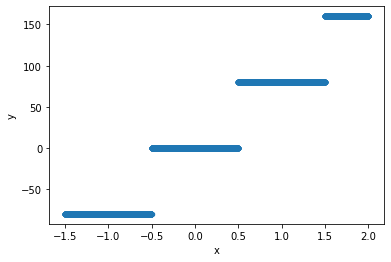

In [114]:
test.plot.scatter(x="x",y="y")

In [263]:
test_mlp=MPL(1,1,[5],sigmoid)

In [264]:
test_mlp.calculate(X)

array([[0.92611473],
       [3.68774105],
       [2.40454252],
       ...,
       [3.46152408],
       [3.2786449 ],
       [3.37272737]])

In [127]:
X=np.vstack(test["x"].to_numpy())

In [177]:
Y_hat=test_mpl.output_layer

In [178]:
Y=np.vstack(test["y"].to_numpy())

In [179]:
sum((Y-Y_hat)**2)

array([70884723.61747867])

In [193]:
np.random.random((1,5))

array([[0.79744999, 0.46417824, 0.5293035 , 0.29351545, 0.87100363]])

In [246]:
Y.min()

-80

In [450]:
test_mlp=MLP(1,1,[4],sigmoid)

In [437]:
test_mlp.weights[0]=np.ones(test_mlp.weights[0].shape)

In [449]:
X.shape

(100, 1)

In [461]:
test_mlp=MLP(1,1,[7],sigmoid)

test_mlp.weights[0]=np.ones(test_mlp.weights[0].shape)
test_mlp.weights[1]=np.ones(test_mlp.weights[1].shape)


test_mlp.calculate(X)
Y_hat=test_mlp.output_layer

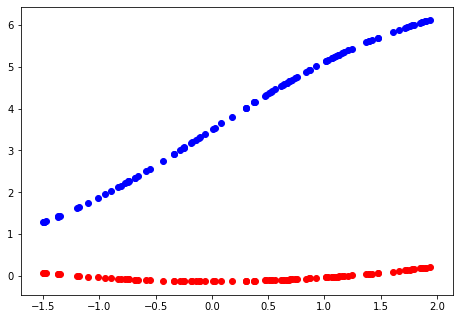

In [462]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X, Y/1000, color='r')
ax.scatter(X,Y_hat,color="b")

In [441]:
Y_hat

array([[0.61455317],
       [0.62361713],
       [0.56344802],
       [0.69348409],
       [0.62297084],
       [0.69207034],
       [0.68538074],
       [0.65494235],
       [0.69325905],
       [0.65190051],
       [0.60711992],
       [0.60926169],
       [0.61760904],
       [0.67396656],
       [0.56364096],
       [0.66956171],
       [0.66015699],
       [0.58194688],
       [0.59563138],
       [0.63610668],
       [0.65992791],
       [0.69428635],
       [0.67090344],
       [0.64412731],
       [0.68137991],
       [0.58465246],
       [0.5972317 ],
       [0.67900524],
       [0.66232126],
       [0.59243281],
       [0.56416212],
       [0.57746614],
       [0.5887193 ],
       [0.63058906],
       [0.58584363],
       [0.66578922],
       [0.55973707],
       [0.61389619],
       [0.63610586],
       [0.55896291],
       [0.64640463],
       [0.57998757],
       [0.61124012],
       [0.65574548],
       [0.6728985 ],
       [0.64369644],
       [0.59137567],
       [0.570